# Paper analyses

Conduct analyses to replicate all figures. This notebook produces results for paper (i.e., Web of Science) data.

# Preliminaries

In [1]:
# load some packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import config

In [2]:
# font
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

# Load the data

In [3]:
# load wos_2017_df
wos_2017_df = pd.read_csv(config.DATA_PATH + "analytical/wos_2017_analytical_df.csv.gz",
                          low_memory=False)

In [4]:
# load normalized measures
wos_cdindex_normalized_analytical_df = pd.read_csv(config.DATA_PATH + "analytical/wos_cdindex_normalized_analytical_df.csv.gz",
                                                   low_memory=False)

In [5]:
# load bornmann measures
wos_cdindex_bornmann_analytical_df = pd.read_csv(config.DATA_PATH + "analytical/wos_cdindex_bornmann_analytical_df.csv.gz",
                                                 low_memory=False)

In [6]:
# load wos_research_panel_general_df
wos_research_panel_general_df = pd.read_csv(config.DATA_PATH + "analytical/wos_research_panel_general_analytical_df.csv.gz",
                                            low_memory=False)

In [7]:
# load unified_cdindex_df
unified_cdindex_df = pd.read_csv(config.DATA_PATH + "analytical/unified_cdindex_df.csv.gz",
                                 low_memory=False)

In [8]:
# load top verbs data
paper_tokens_table_df = pd.read_csv(config.DATA_PATH + "analytical/paper_tokens_table_analytical_df.csv.gz",
                                    low_memory=False)

In [9]:
# load stata margins results
papers_regadj_m4_df = pd.read_stata(config.DATA_PATH 
                                    + "analytical/papers_regression_adjustments_m4.dta").rename(columns={"_m1": "year",
                                                                                                         "_margin": "cd_5_adj",
                                                                                                         "_ci_lb": "ci_lower",
                                                                                                         "_ci_ub": "ci_upper"})
patents_regadj_m4_df = pd.read_stata(config.DATA_PATH 
                                     + "analytical/patents_regression_adjustments_m4.dta").rename(columns={"_m1": "year",
                                                                                                           "_margin": "cd_5_adj",
                                                                                                           "_ci_lb": "ci_lower",
                                                                                                           "_ci_ub": "ci_upper"})

In [10]:
# load shapley decomposition results
shapley_decomposition_df = pd.read_csv(config.DATA_PATH + "analytical/shapley_decomposion_results.csv.gz",
                                       low_memory=False)

In [11]:
# load rewired cd index results
wos_rewired_df = pd.read_csv(config.DATA_PATH + "analytical/wos_cdindex_rewired_analytical_df.csv.gz",
                             low_memory=False)

# Figure 1

### Overview of the measurement approach (Panel B, papers)

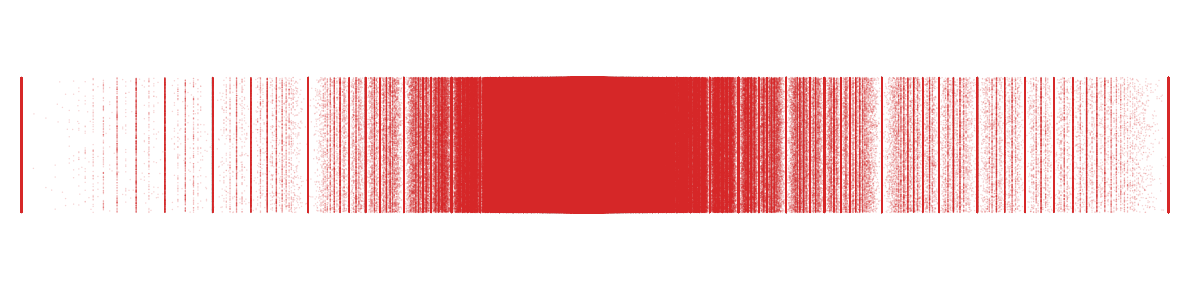

In [12]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

# plot
sns.stripplot(x="cd_5",
              size=1,
              jitter=0.25,
              data=wos_2017_df,
              alpha=0.2,
              ax=ax,
              color="#d62728")
ax.margins(x=0.01)

# turn off ticks
plt.axis("off")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_1b_papers.pdf")

# Figure 2

### Average $CD_5$ (Panel A)

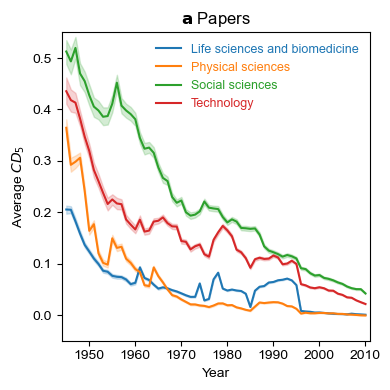

In [13]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=wos_2017_df,
             x="pubyear",
             y="cd_5",
             hue="research_area_r1",
             hue_order=config.RESEARCH_AREA_ORDER,
             ax=ax)
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(-0.05, 0.55)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average $CD_5$")
ax.set_title(r"$\bf{a}$ Papers", 
             loc="center")

# get rid of extra space
plt.tight_layout()

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# save
plt.savefig(config.OUTPUT_PATH + "figure_2_panel_a.pdf",
            bbox_inches="tight")

# Figure 3

### Unique words/Total words (Panel A)

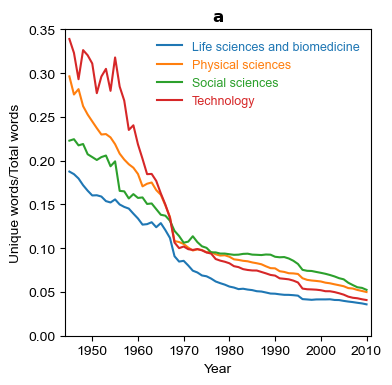

In [14]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
(wos_research_panel_general_df.groupby(["year",
                                       "research_area"])["titles_ttr"]
                                       .mean()
                                       .unstack()
                                       .plot(ax=ax))
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(0, 0.35)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Unique words/Total words")
ax.set_title(r"$\bf{a}$",
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save figure
plt.savefig(config.OUTPUT_PATH + "figure_3_panel_a.pdf")

### New word pairs/Total word pairs (Panel B)

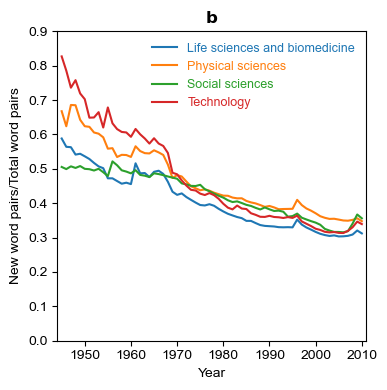

In [15]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
(wos_research_panel_general_df.groupby(["year",
                                        "research_area"])["artls_titles_sp_tok_pairs_new_t_frac"]
                              .mean()
                              .unstack()
                              .plot(ax=ax))
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(0.0, 0.9)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("New word pairs/Total word pairs")
ax.set_title(r"$\bf{b}$",
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save figure
plt.savefig(config.OUTPUT_PATH + "figure_3_panel_b.pdf")

### Verb use per 100 verbs (Panel C)

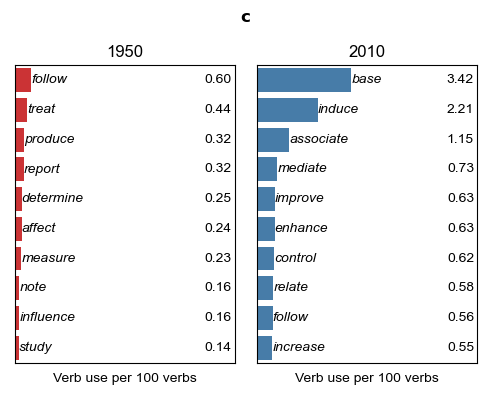

In [16]:
# initialize figure
fig, axs = plt.subplots(1, 2, figsize=(5,4))
axs = axs.flat

# plot 1950
sns.barplot(data=paper_tokens_table_df,
            y="token_d1950",
            x="nrp100_d1950",
            color="#e41a1c",
            ax=axs[0])
axs[0].set_xlim(0,8)
axs[0].set_xlabel("Verb use per 100 verbs")
axs[0].set_ylabel(None)
axs[0].set_title("1950",
                 loc="center")
axs[0].set_xticks([])
axs[0].set_yticks([])

# add tokens + rates
for i, token in enumerate(paper_tokens_table_df.itertuples()):
  axs[0].text(token.nrp100_d1950,
              i,
              token.token_d1950,
              va="center",
              style="italic")
  axs[0].text(6.9,
              i,
              "%.2f" % token.nrp100_d1950,
              va="center")

# plot 2010
sns.barplot(data=paper_tokens_table_df,
            y="token_d2010",
            x="nrp100_d2010",
            color="#377eb8",
            ax=axs[1])
axs[1].set_xlim(0,8)
axs[1].set_xlabel("Verb use per 100 verbs")
axs[1].set_ylabel(None)
axs[1].set_title("2010",
                 loc="center")
axs[1].set_xticks([])
axs[1].set_yticks([])

# add tokens + rates
for i, token in enumerate(paper_tokens_table_df.itertuples()):
  axs[1].text(token.nrp100_d2010,
              i,
              token.token_d2010,
              va="center",
              style="italic")
  axs[1].text(6.9,
              i,
              "%.2f" % token.nrp100_d2010,
              va="center")

# add overall title
fig.suptitle(r"$\bf{c}$",
             y=0.975)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_3_panel_c.pdf",
            bbox_inches="tight")

# Figure 4

### Conservation of high disruption (Panel A)

In [17]:
# set bins
d_5_bins = pd.IntervalIndex.from_tuples([(0.00, 0.25),
                                         (0.25, 0.50),
                                         (0.50, 0.75),
                                         (0.75, 1.00)], closed="right")
c_5_bins = pd.IntervalIndex.from_tuples([(-1.00, -0.75),
                                         (-0.75, -0.50),
                                         (-0.50, -0.25),
                                         (-0.25, 0.00)], closed="left")

In [18]:
# assign bins
wos_2017_df["d_5_bins"] = pd.cut(wos_2017_df["cd_5"],
                                 d_5_bins)
wos_2017_df["c_5_bins"] = pd.cut(wos_2017_df["cd_5"],
                                 c_5_bins)

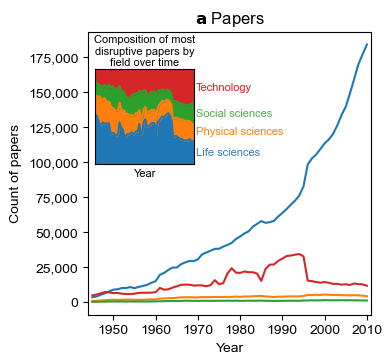

In [19]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
(wos_2017_df.groupby(["pubyear",
                      "d_5_bins"])["record_id"]
            .count()
            .unstack()
            .plot(ax=ax,
                  legend=False))
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_aspect(1/ax.get_data_ratio())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel("Year")
ax.set_ylabel("Count of papers")
ax.set_title(r"$\bf{a}$ Papers",
             loc="center")

# inset axis
iaxs = ax.inset_axes([0.025,0.525,0.35,0.35])
iaxs_df = wos_2017_df[wos_2017_df.cd_5>0.25].groupby(["pubyear",
                                                      "research_area_r1"])["record_id"].count().unstack()
iaxs_df = iaxs_df.divide(iaxs_df.sum(axis=1),
                         axis=0)
iaxs_df.plot.area(ax=iaxs,
                  legend=False)
iaxs.margins(0, 0)
iaxs.set_title("Composition of most\ndisruptive papers by\nfield over time", 
               size=8,
               y=0.95)
iaxs.set_xlabel("Year", 
                size=8,
                labelpad=0)
iaxs.set_ylabel(None)
iaxs.set_xticks([])
iaxs.set_yticks([])
iaxs.set_aspect(1/iaxs.get_data_ratio())
iaxs.set_ylim(0, 1)

# field labels for inset
ax.text(1969.5, 151000, "Technology", fontsize=8, color="#e41a1c")
ax.text(1969.5, 132500, "Social sciences", fontsize=8, color="#4daf4a")
ax.text(1969.5, 120000, "Physical sciences", fontsize=8, color="#ff7f00")
ax.text(1969.5, 105000, "Life sciences", fontsize=8, color="#377eb8")

# configure legend labels                                                             
legend_handles, legend_labels = ax.get_legend_handles_labels()

# legend
"""
bbox_to_anchor = (1.3,0.5)
lgd = fig.legend(legend_handles,
                 legend_labels,
                 ncol = 1,
                 bbox_to_anchor=bbox_to_anchor,
                 loc="center right",
                 title="$CD_5$ value",
                 fontsize=config.LEGEND_FONTSIZE,
                 frameon=True)
"""

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_4_panel_a.pdf",
            #bbox_extra_artists=(lgd,),
            bbox_inches="tight")

# Figure 5

### CD index of high-quality science over time (Inset)

In [20]:
# issn subset
ISSNS = {"0036-8075": "Science",
         "0028-0836": "Nature",
         "0027-8424": "PNAS"}

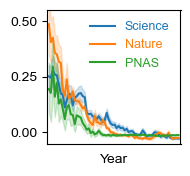

In [21]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=(2,2))

# create a dataframe of top journals
top_journals_df = wos_2017_df[wos_2017_df["issn"].isin(list(ISSNS.keys()))]
top_journals_df = top_journals_df[["pubyear",
                                   "cd_5",
                                   "issn"]]
top_journals_df.issn = top_journals_df.issn.replace(ISSNS)

# plot
sns.lineplot(data=top_journals_df,
             x="pubyear",
             y="cd_5",
             hue="issn",
             ax=ax)
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks([])
ax.set_yticks([0.0,0.25,0.5])
ax.set_ylim(-0.05, 0.55)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel(None)

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_5_inset.pdf",
            bbox_inches="tight")

# Figure 6

### Diversity of work cited (Panel A, A1, A2)

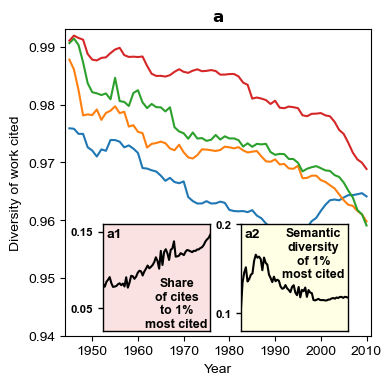

In [22]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
(wos_research_panel_general_df.groupby(["year",
                                        "research_area"])["articles_cited_nentropy_t"]
                              .mean()
                              .unstack()
                              .plot(ax=ax,
                                    legend=False))
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(0.94, 0.993)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Diversity of work cited")
ax.set_title(r"$\bf{a}$", 
             loc="center")

# inset axis 1
iax1 = ax.inset_axes([0.125,0.015,0.35,0.35])
(wos_research_panel_general_df.groupby(["year",])["top_1pct_cite_share"]
                              .mean()
                              .plot(ax=iax1,
                                    color="#000000",
                                    legend=False))
iax1.set_yticks([0.05,0.15])
iax1.set_yticklabels([0.05,0.15],
                     fontsize="small")
iax1.set_ylim(0.02, 0.16)
iax1.set_xlim(1945, 2010)
iax1.set_aspect(1/iax1.get_data_ratio())
iax1.set_xlabel(None)
iax1.set_ylabel(None)
iax1.set_xticks([])
iax1.set_facecolor("#e41a1c20")

# add annotations
iax1.text(0.035, 
          0.875, 
          "a1", 
          fontsize=10, 
          weight="bold", 
          transform=iax1.transAxes)
iax1.text(0.685, 
          0.035, 
          "Share\nof cites\nto 1%\nmost cited", 
          fontsize=9, 
          weight="bold", 
          transform=iax1.transAxes, 
          ha="center")

# thicken borders
[x.set_linewidth(1) for x in iax1.spines.values()]
iax1.xaxis.set_tick_params(width=1)
iax1.yaxis.set_tick_params(width=1)
labels = iax1.get_xticklabels() + iax1.get_yticklabels()
[label.set_fontweight("bold") for label in labels]


# inset axis 2
iax2 = ax.inset_axes([0.575,0.015,0.35,0.35])
(wos_research_panel_general_df.groupby(["year",])["ttl_coef_var"]
                              .mean()
                              .plot(ax=iax2,
                                    color="#000000",
                                    legend=False))
iax2.set_yticks([0.10,0.20])
iax2.set_yticklabels([0.10,0.20],
                     fontsize="small")
iax2.set_ylim(0.08, 0.20)
iax2.set_xlim(1945, 2010)
iax2.set_aspect(1/iax2.get_data_ratio())
iax2.set_xlabel(None)
iax2.set_ylabel(None)
iax2.set_xticks([])
iax2.set_facecolor("#ffffe5")

# add annotations
iax2.text(0.035, 
          0.875, 
          "a2", 
          fontsize=10, 
          weight="bold", 
          transform=iax2.transAxes)
iax2.text(0.675, 
          0.5, 
          "Semantic\ndiversity\nof 1%\nmost cited", 
          fontsize=9, 
          weight="bold", 
          transform=iax2.transAxes, 
          ha="center")

# thicken borders
[x.set_linewidth(1) for x in iax2.spines.values()]
iax2.xaxis.set_tick_params(width=1)
iax2.yaxis.set_tick_params(width=1)
labels = iax2.get_xticklabels() + iax2.get_yticklabels()
[label.set_fontweight("bold") for label in labels]

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_6_panel_a_a1_a2.pdf", 
            bbox_inches="tight")

### Mean self-citations per paper (Panel B)

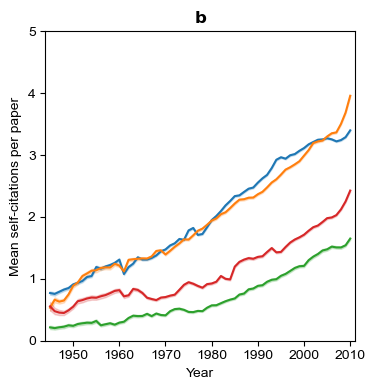

In [23]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=wos_2017_df[wos_2017_df.cited_self_risk == 1], 
             x="pubyear", 
             y="cited_self",
             hue="research_area_r1",
             hue_order=config.RESEARCH_AREA_ORDER,
             ax=ax,
             legend=False)
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(0, 5)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Mean self-citations per paper")
ax.set_title(r"$\bf{b}$", 
             loc="center")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_6_panel_b.pdf", 
            bbox_inches="tight")

### Mean age of work cited (Panel C)

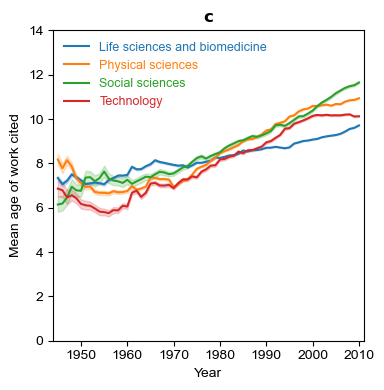

In [24]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=wos_2017_df, 
             x="pubyear", 
             y="cited_age_mean",
             hue="research_area_r1",
             hue_order=config.RESEARCH_AREA_ORDER,
             ax=ax)
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(0, 14)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Mean age of work cited")
ax.set_title(r"$\bf{c}$", 
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "figure_6_panel_c.pdf", 
            bbox_inches="tight")

# Extended Data Figure 1

### Distribution of $CD_5$ (Panel A)

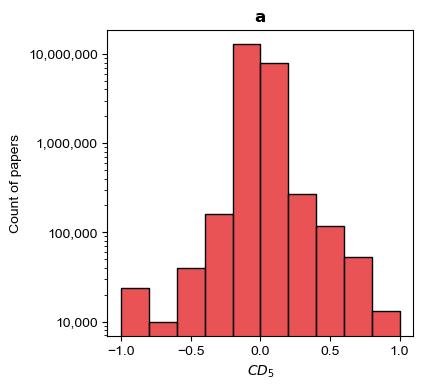

In [25]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=(6,4))

# plot
sns.histplot(x="cd_5",
             data=wos_2017_df,
             binwidth=0.2,
             stat="count",
             color="#e41a1c",
             ax=ax)
ax.set_yscale("log")
ax.set_aspect(1/ax.get_data_ratio())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel("$CD_5$")
ax.set_ylabel("Count of papers")
ax.set_title(r"$\bf{a}$",
             loc="center")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_1_panel_a.pdf",
            bbox_inches="tight")

### Distribution of $CD_5$ (Panel B)

In [26]:
# set decade bins
wos_2017_df = wos_2017_df.assign(pubyear_10yrs = pd.cut(wos_2017_df.pubyear,
                                                        pd.IntervalIndex.from_tuples([(1950, 1960),
                                                                                      (1960, 1970),
                                                                                      (1970, 1980),
                                                                                      (1980, 1990),
                                                                                      (1990, 2000),
                                                                                      (2000, 2010),])))

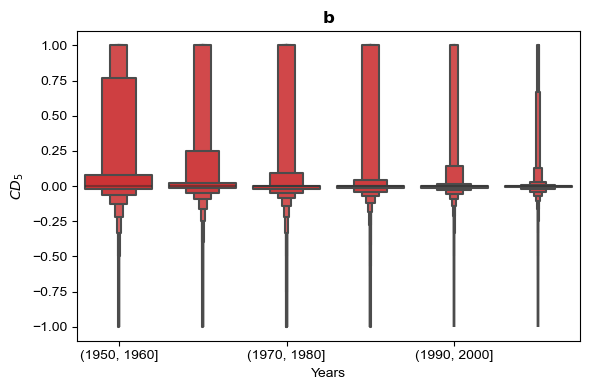

In [27]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=(6,4))

# plot
sns.boxenplot(x="pubyear_10yrs",
              y="cd_5",
              color="#e41a1c",
              data=wos_2017_df,
              ax=ax)
ax.set_xlabel("Years")
ax.set_ylabel("$CD_5$")
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_title(r"$\bf{b}$",
             loc="center")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_1_panel_b.pdf",
            bbox_inches="tight")

# Extended Data Figure 2

### CD index measured 10 years post publication (Panel A)

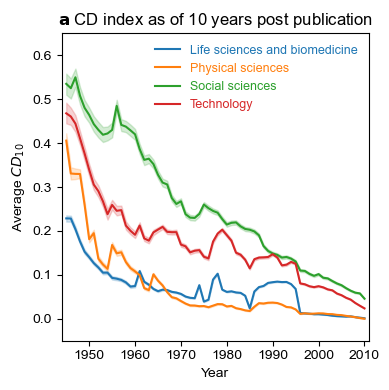

In [28]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=wos_2017_df,
             x="pubyear",
             y="cd_10",
             hue="research_area_r1",
             hue_order=config.RESEARCH_AREA_ORDER,
             ax=ax)
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(-0.05, 0.65)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average $CD_{10}$")
ax.set_title(r"$\bf{a}$ CD index as of 10 years post publication",
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_2_panel_a.pdf",
            bbox_inches="tight")

### CD index measured as of 2017 (Panel B)

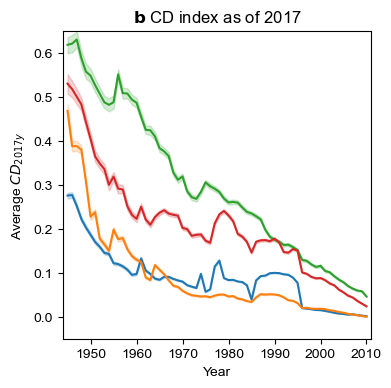

In [29]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=wos_2017_df,
             x="pubyear",
             y="cd_2017y",
             hue="research_area_r1",
             hue_order=config.RESEARCH_AREA_ORDER,
             ax=ax,
             legend=None)
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(-0.05, 0.65)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average $CD_{2017y}$")
ax.set_title(r"$\bf{b}$ CD index as of 2017",
             loc="center")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_2_panel_b.pdf",
            bbox_inches="tight")

# Extended Data Figure 3

### Unique words/Total words (Panel A)

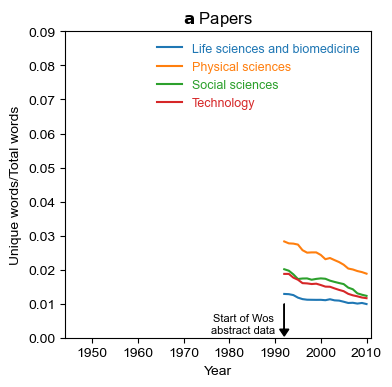

In [30]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
(wos_research_panel_general_df.groupby(["year",
                                       "research_area"])["abstracts_ttr"]
                                       .mean()
                                       .unstack()
                                       .plot(ax=ax))
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(0, 0.09)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Unique words/Total words")
ax.set_title(r"$\bf{a}$ Papers",
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# add the arrow
plt.arrow(x=1992,
          y=0.01,
          dx=0.0,
          dy=-0.0075,
          head_width=2,
         head_length=0.002,
         color="#000000")

# add the annotation
ax.text(x=1983, 
        y=0.004, 
        s="Start of Wos\nabstract data", 
        fontsize=8,
        ha="center",
        va="center")

# get rid of extra space
plt.tight_layout()

# save figure
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_3_panel_a.pdf",
            bbox_inches="tight")

# Extended Data Figure 4

### Declining combinatorial novelty (Panel A)

In [31]:
# set decade bins (papers)
wos_2017_df = wos_2017_df.assign(pubyear_decade = pd.cut(wos_2017_df.pubyear,
                                                         pd.IntervalIndex.from_tuples([(1950, 1960),
                                                                                       (1960, 1970),
                                                                                       (1970, 1980),
                                                                                       (1980, 1990),
                                                                                       (1990, 2000),
                                                                                       (2000, 2010),])))

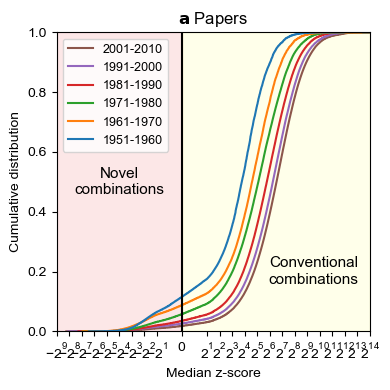

In [32]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=(config.STANDARD_FIGSIZE))

# plot
sns.ecdfplot(data=wos_2017_df,
             x="zscores_median",
             hue="pubyear_decade",
             ax=ax)
ax.axvline(x=0,
           color="black")
ax.axvspan(-2**9, 0,
           alpha=0.1,
           color="#e41a1c")
ax.axvspan(0, 
           2**14,
           alpha=0.1,
           color="#ffff33")
ax.set_ylim(0, 1)
ax.set_xscale("symlog",
              base=2)
ax.set_xlim(-2**9,
            2**14)
ax.set_xlabel("Median z-score")
ax.set_ylabel("Cumulative distribution")
ax.set_title(r"$\bf{a}$ Papers", 
             loc="center")
ax.legend(["1951-1960",
           "1961-1970",
           "1971-1980",
           "1981-1990",
           "1991-2000",
           "2001-2010"][::-1],
          loc="upper left",
          ncol=1,
          fancybox=True,
          shadow=False,
          fontsize=config.LEGEND_FONTSIZE,
          frameon=True)
ax.text(2**9.5,
        0.2,
        "Conventional\ncombinations",
        ha="center",
        va="center",
        fontsize=11)
ax.text(-2**4,
        0.5,
        "Novel\ncombinations",
        ha="center",
        va="center",
        fontsize=11)

# get rid of extra space
plt.tight_layout()

# save figure
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_4_panel_a.pdf",
            bbox_inches="tight")

# Extended Data Figure 5

### Contribution of field, year, and author effects

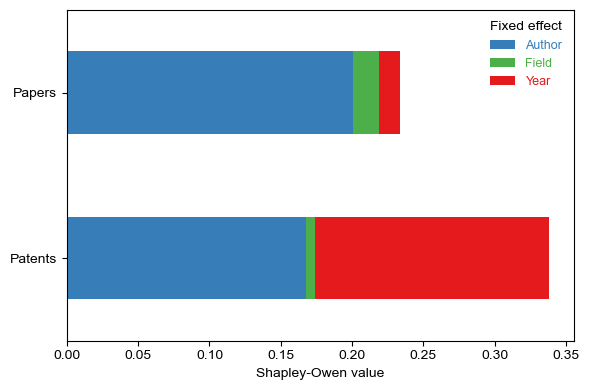

In [33]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# plot
(shapley_decomposition_df.pivot(index="type",
                                columns="predictor",
                                values="shapley")
                         .sort_values("type",
                                      ascending=False)
                         .plot
                         .barh(stacked=True,
                               color=["#377eb8",
                                      "#4daf4a",
                                      "#e41a1c"],
                               ax=ax))
ax.set_ylabel(None)
ax.set_xlabel("Shapley-Owen value")

# add the legend
plt.legend(title="Fixed effect",
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save figure
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_5.pdf",
            bbox_inches="tight")

# Extended Data Figure 6

### CD index over time across other data sources

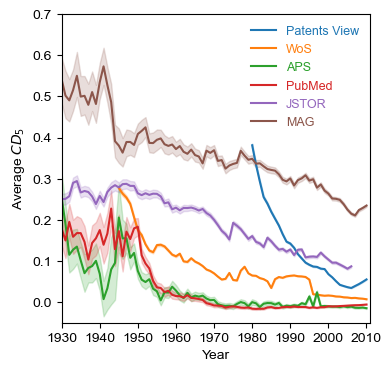

In [34]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=unified_cdindex_df,
             x="year",
             y="cd_5",
             hue="source",
             ax=ax)
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks([1930, 1940] + config.PAPER_YEAR_TICKS)
ax.set_ylim(-0.05, 0.7)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average $CD_5$")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_6.pdf",
            bbox_inches="tight")

# Extended Data Figure 7

### Alternative measures of disruption (Panel A)

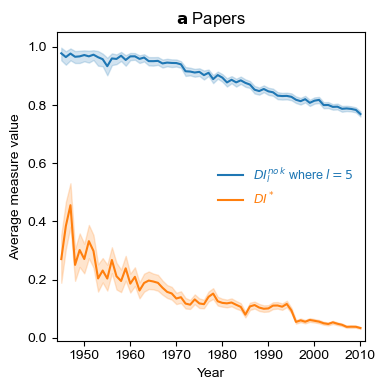

In [35]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=wos_cdindex_bornmann_analytical_df,
             x="pubyear",
             y="value",
             hue="variable",
             ax=ax)
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(-0.01, 1.05)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average measure value")
ax.set_title(r"$\bf{a}$ Papers",
             loc="center")

# add the legend
ax.legend(title=None,
          fontsize=config.LEGEND_FONTSIZE,
          frameon=config.LEGEND_FRAMEON,
          labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_7_panel_a.pdf",
            bbox_inches="tight")

# Extended Data Figure 8

### Paper/patent and field $\times$ year normalized versions of the $CD_5$ index (Panel A)

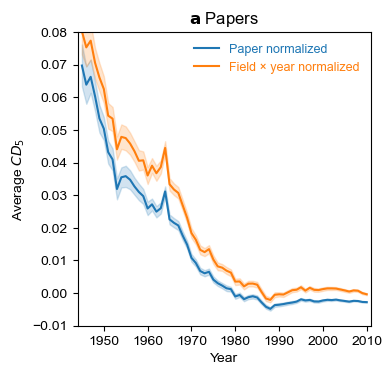

In [36]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=wos_cdindex_normalized_analytical_df,
             x="pubyear",
             y="value",
             hue="variable",
             ax=ax)
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(-0.01, 0.08)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average $CD_5$")
ax.set_title(r"$\bf{a}$ Papers",
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_8_panel_a.pdf",
            bbox_inches="tight")

### Predicted values of the $CD_5$ index by year after adjusting for patterns in publication, citation, and authorship practices (Panel B)

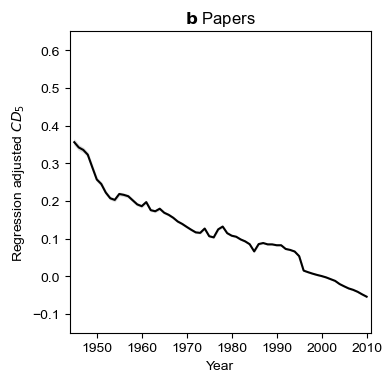

In [37]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
ax.plot(papers_regadj_m4_df.year,
        papers_regadj_m4_df.cd_5_adj,
        color="#000000")
ax.fill_between(papers_regadj_m4_df.year,
                (papers_regadj_m4_df.ci_lower),
                (papers_regadj_m4_df.ci_upper),
                color="#cccccc",
                alpha=0.5)
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(-0.15, 0.65)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Regression adjusted $CD_5$")
ax.set_title(r"$\bf{b}$ Papers",
             loc="center")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_8_panel_b.pdf",
            bbox_inches="tight")

### Comparison of the observed values of the $CD_5$ index to those obtained from randomly rewired citation networks (Panel C)

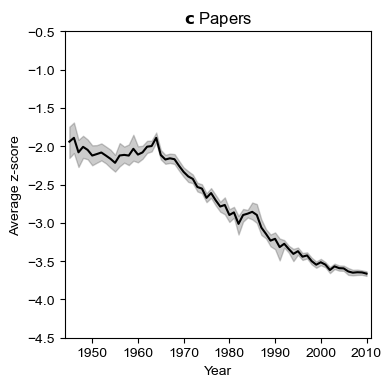

In [38]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
sns.lineplot(data=wos_rewired_df,
             x="pubyear",
             y="cd_5_zscore",
             color="#000000",
             ax=ax)
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(-4.5, -0.5)
ax.set_aspect(1/ax.get_data_ratio())
ax.set_xlabel("Year")
ax.set_ylabel("Average z-score")
ax.set_title(r"$\bf{c}$ Papers",
             loc="center")

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_8_panel_c.pdf",
            bbox_inches="tight")

# Extended Data Figure 9

### Growth of scientific and technological knowledge (Panel A)

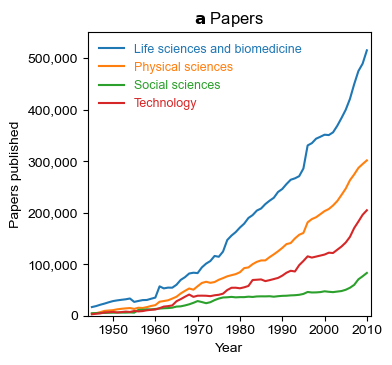

In [39]:
# initialize figure
fig, ax = plt.subplots(1, 1, figsize=config.STANDARD_FIGSIZE)

# plot
(wos_2017_df.groupby(["pubyear",
                      "research_area_r1"])["record_id"]
            .count()
            .unstack()
            .plot(ax=ax,
                  legend=True))
ax.set_xlim(config.PAPER_MIN_YEAR, config.PAPER_MAX_YEAR)
ax.set_xticks(config.PAPER_YEAR_TICKS)
ax.set_ylim(0, 550000)
ax.set_aspect(1/ax.get_data_ratio())
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel("Year")
ax.set_ylabel("Papers published")
ax.set_title(r"$\bf{a}$ Papers",
             loc="center")

# add the legend
plt.legend(title=None,
           fontsize=config.LEGEND_FONTSIZE,
           frameon=config.LEGEND_FRAMEON,
           labelcolor=config.LEGEND_LABELCOLOR)

# get rid of extra space
plt.tight_layout()

# save
plt.savefig(config.OUTPUT_PATH + "extended_data_figure_9_panel_a.pdf",
            bbox_inches="tight")